# Basic Power Monitoring Tutorial

This notebook demonstrates the basic usage of power monitoring features in the Power-aware HPC Benchmarking project.

## Contents
1. Setup and Installation
2. Basic CPU Monitoring
3. Basic GPU Monitoring
4. Visualizing Results

## 1. Setup and Installation

First, let's set up our environment and import required packages:

In [1]:
import sys
import os
import time
import logging
from pathlib import Path

# Add project root to Python path
project_root = Path.cwd().parent.parent
sys.path.append(str(project_root))

# Import project modules
from src.power_profiling.utils.logging_config import setup_logging
from src.power_profiling.monitors.cpu import CPUMonitor
from src.power_profiling.monitors.gpu import GPUMonitor

# Setup logging
logger = setup_logging(log_level=logging.INFO)

INFO - Logging initialized. Log file: logs/power_benchmark_20250428_192452.log


## 2. Basic CPU Monitoring

Let's start with a simple CPU power monitoring example:

In [16]:
def cpu_intensive_task():
    """A simple CPU-intensive task."""
    result = 0
    for i in range(10**8):
        result += i
    return result

# Create CPU monitor
cpu_monitor = CPUMonitor(sampling_interval=0.1)  # 100ms sampling interval

# Start monitoring
print("Starting CPU monitoring...")
cpu_monitor.start()
time.sleep(1)  # Wait for the monitor thread to start

cpu_monitor.clear()  # Clear any idle/baseline readings
# Run CPU task
print("Running CPU-intensive task...")
result = cpu_intensive_task()

# Stop monitoring
cpu_data = cpu_monitor.stop()
print(f"Collected {len(cpu_data)} CPU power readings")

# Print all readings
for reading in cpu_data:
    print(f"Time: {reading.timestamp}, Power: {reading.power_watts:.2f} W")

# Get statistics
stats = cpu_monitor.get_statistics()
print("\nCPU Power Statistics:")
print(f"Average Power: {stats['average']:.2f} W")
print(f"Peak Power: {stats['peak']:.2f} W")
print(f"Total Energy: {stats['total_energy']:.2f} J")

INFO - Initializing CPUMonitor with sampling_interval=0.1s
INFO - Detected CPU power monitoring interface: intel_rapl
Starting CPU monitoring...
INFO - CPU monitoring started
Running CPU-intensive task...
INFO - CPU monitoring stopped
Collected 13 CPU power readings
WARNING - No power data available for statistics
{'average': 0.0, 'peak': 0.0, 'min': 0.0, 'total_energy': 0.0}


## 3. Basic GPU Monitoring

Now let's try monitoring GPU power usage (if available):

In [8]:
try:
    # Create GPU monitor
    gpu_monitor = GPUMonitor(sampling_interval=0.1)
    
    # Start monitoring
    print("Starting GPU monitoring...")
    gpu_monitor.start()
    time.sleep(1)  # Wait for the monitor thread to start
    
    gpu_monitor.clear()  # Clear any idle/baseline readings
    
    # Simulate GPU workload (sleep for demonstration)
    print("Simulating GPU workload...")
    time.sleep(5)
    
    # Stop monitoring
    gpu_data = gpu_monitor.stop()
    print(f"Collected {len(gpu_data)} GPU power readings")
    
    # Print all readings
    for reading in gpu_data:
        print(f"Time: {reading.timestamp}, Power: {reading.power_watts:.2f} W")
    
    # Get statistics
    stats = gpu_monitor.get_statistics()
    print("\nGPU Power Statistics:")
    print(f"Average Power: {stats['average']:.2f} W")
    print(f"Peak Power: {stats['peak']:.2f} W")
    print(f"Total Energy: {stats['total_energy']:.2f} J")
    
except Exception as e:
    print(f"GPU monitoring not available: {e}")

GPU monitoring not available: Can't instantiate abstract class GPUMonitor with abstract method _read_power


## 4. Visualizing Results

Let's create some basic visualizations of our power monitoring data:

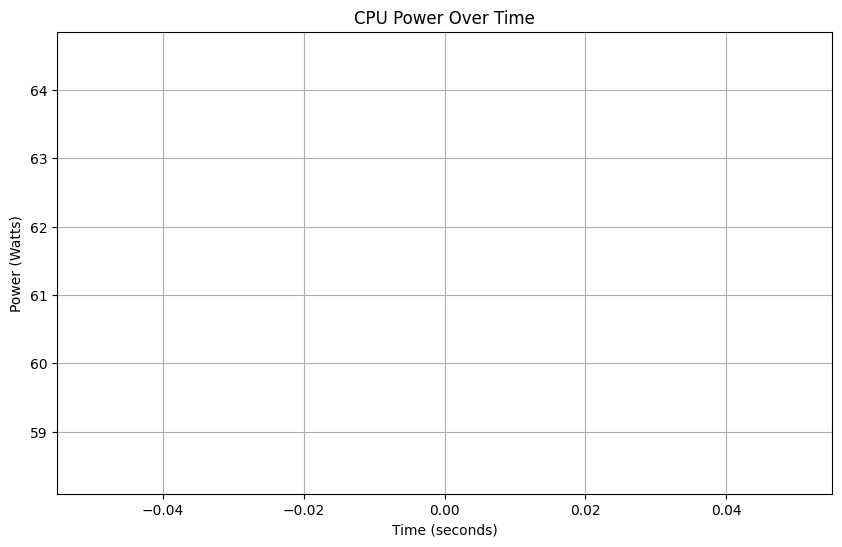

In [4]:
import matplotlib.pyplot as plt
import numpy as np

def plot_power_data(data, title):
    if not data:
        print(f"No data available for {title}")
        return
        
    # Extract timestamps and power readings
    timestamps = [reading.timestamp for reading in data]
    power_readings = [reading.power_watts for reading in data]
    
    # Convert timestamps to relative time in seconds
    start_time = timestamps[0]
    rel_times = [(t - start_time).total_seconds() for t in timestamps]
    
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(rel_times, power_readings, '-')
    plt.title(f"{title} Power Over Time")
    plt.xlabel("Time (seconds)")
    plt.ylabel("Power (Watts)")
    plt.grid(True)
    plt.show()

# Plot CPU data
if 'cpu_data' in locals():
    plot_power_data(cpu_data, "CPU")

# Plot GPU data
if 'gpu_data' in locals():
    plot_power_data(gpu_data, "GPU")

## Conclusion

This notebook demonstrated basic power monitoring capabilities:
- Setting up power monitors
- Collecting power readings
- Getting basic statistics
- Visualizing the results

For more advanced features, check out the advanced usage examples notebook.